In [5]:
import numpy as np
import pandas as pd
import json

df = pd.read_csv("data/merged_fill.csv") 
with open("data/meta.json", "r", encoding="utf8") as f:
    meta = json.load(f)

env_in_df = df[meta["environment"]["inside"].keys()]
env_out_df = df[meta["environment"]["outside"].keys()]
control_df = df[meta["control"].keys()]
growth_df = df[meta["growth"].keys()]

df.columns

Index(['FRT_LNGTH', 'FWRCT_HGHT', 'BLMNG_CLUSTER', 'FRST_TREE_CNT', 'FRT_WT',
       'FRT_WDTH', 'GRTH_LNGTH', 'YIELD_CNT', 'YIELD_CLUSTER', 'LAST_FWRCT_NO',
       'LEAF_LNGTH', 'LEAF_CNT', 'LEAF_WDTH', 'PLT_LNGTH', 'STEM_THNS',
       'HTNG_TPRT_2', 'MSRM_DT', 'PFBS_NTRO_CBDX_CTRN', 'EXTN_TPRT',
       'DWP_TPRT', 'WNDRC', 'ABSLT_HMDT', 'WDSP', 'STRTN_WATER', 'EXTN_SRQT',
       'WATER_LACK_VL', 'EXTN_ACCMLT_QOFLG', 'SPL_TPRT_1', 'SPL_TPRT_2',
       'HTNG_TPRT_1', 'VNTILAT_TPRT_5', 'VNTILAT_TPRT_4', 'VNTILAT_TPRT_3',
       'VNTILAT_TPRT_2', 'VNTILAT_TPRT_1', 'TRWVLV_OPDR_RATE_2',
       'TRWVLV_OPDR_RATE_1', 'HRZNT_SCRN_OPDR_RATE_2', 'SKLT_OPDR_RATE_1_LEFT',
       'HRZNT_SCRN_OPDR_RATE_1', 'SKLT_OPDR_RATE_1_RIGHT', 'INNER_TPRT_1',
       'INNER_TPRT_2', 'AVE_INNER_TPRT_1_2', 'AVE_INNER_HMDT_1_2',
       'INNER_HMDT_1', 'INNER_HMDT_2', 'CBDX_STNG_VL', 'WTSPL_QTY',
       'NTSLT_SPL_PH_LVL', 'NTSLT_SPL_PH_LVL_STNG_VL', 'NTSLT_SPL_ELCDT',
       'NTSLT_SPL_ELCDT_STNG_VL', 'RTTN_PUMP_

In [6]:
df["INNER_HMDT"] = (df["INNER_HMDT_1"] + df["INNER_HMDT_2"]) / 2
df["INNER_TPRT"] = (df["INNER_TPRT_1"] + df["INNER_TPRT_2"]) / 2
df["RTTN_PUMP_OPRT_YN"] = df[["RTTN_PUMP_OPRT_YN_1","RTTN_PUMP_OPRT_YN_2"]].apply(
    lambda x: 0 if 1 in x.values else 1, axis=1)
df["RTTN_PUMP_OPRT_YN"].value_counts()

1    47687
0    22174
Name: RTTN_PUMP_OPRT_YN, dtype: int64

In [10]:
x = (i for i in range(10))
next(x)
next(x)

1

In [15]:
def linear_interpolation(point1, point2, num_points):
    
    x1, y1 = point1
    x2, y2 = point2
    n = num_points - 1
    return (
        (
            x1 + i * (x2 - x1) / n, 
            y1 + i * (y2 - y1) / n
        )
        for i in range(n, -1, -1)
    )
    # interpolated_points = []
    # for i in range(num_points-1, -1, -1):
    #     x = 
    #     y = y1 + i * (y2 - y1) / (num_points - 1)
    #     interpolated_points.append((x, y))
    # return interpolated_points

for g in growth_df.columns:
    start = 0
    for i in range(1, df.shape[0]):
        if df[g].iloc[i] != df[g].iloc[i-1]:
            if i - start <= 1:
                continue
            points = linear_interpolation(
                (i, df[g].iloc[i]), (start, df[g].iloc[start]), 
                i-start
            ) 
            for j in range(start, i):
                df[g].iloc[j] = next(points)[1]
            start = i

C:\Users\32mou\AppData\Local\Temp\ipykernel_27548\148159736.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[g].iloc[j] = next(points)[1]


In [16]:
growth= {
    "large": { # 1000 ~
        "PLT_LNGTH": "식물길이", # 혼자 하늘을 날고 있어서 제외: 3000->7000
    },
    "middle": { # 50 ~ 500
        "FRT_LNGTH": "과일길이",
        "LEAF_WDTH": "엽폭",
        "LEAF_LNGTH": "엽장",
        "FRT_WT": "과일무게",
        "FWRCT_HGHT": "화방높이",
        "FRT_WDTH": "과일폭",
        "GRTH_LNGTH": "생장길이"
    },
    "small": { # 0 ~ 25
        "STEM_THNS": "줄기굵기",
        "LAST_FWRCT_NO": "최종화방번호",
        "LEAF_CNT": "엽수",
        "BLMNG_CLUSTER": "개화군",
        "YIELD_CLUSTER": "수확군",
        "FRST_TREE_CNT": "착과수",
    }
}


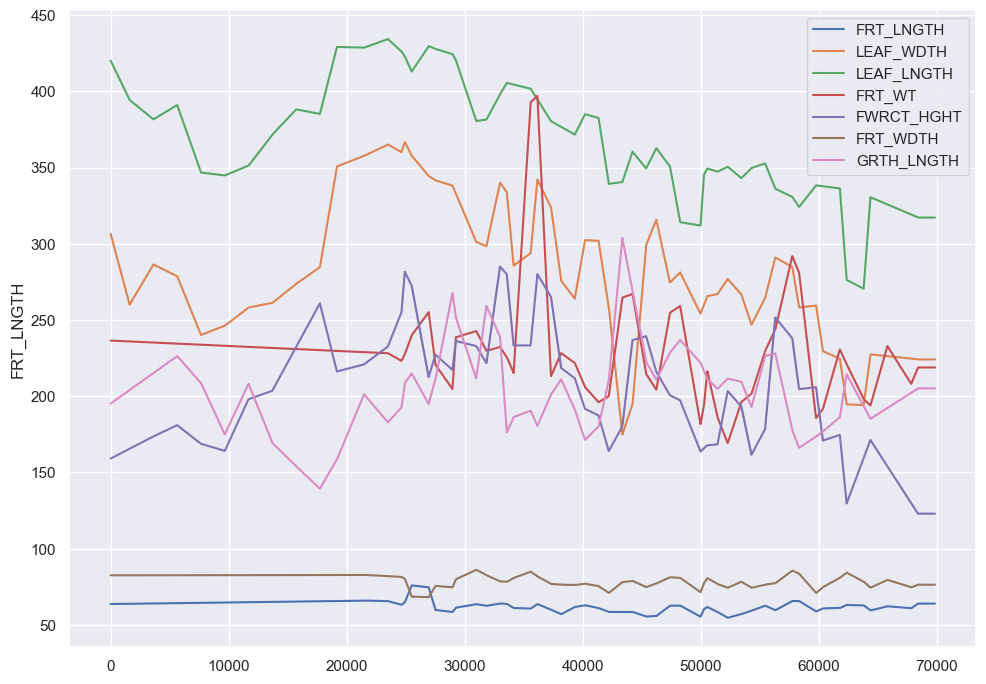

In [19]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7, 8.27)})
for k in growth["middle"].keys():
    sns.lineplot(data=df[k], label=k)

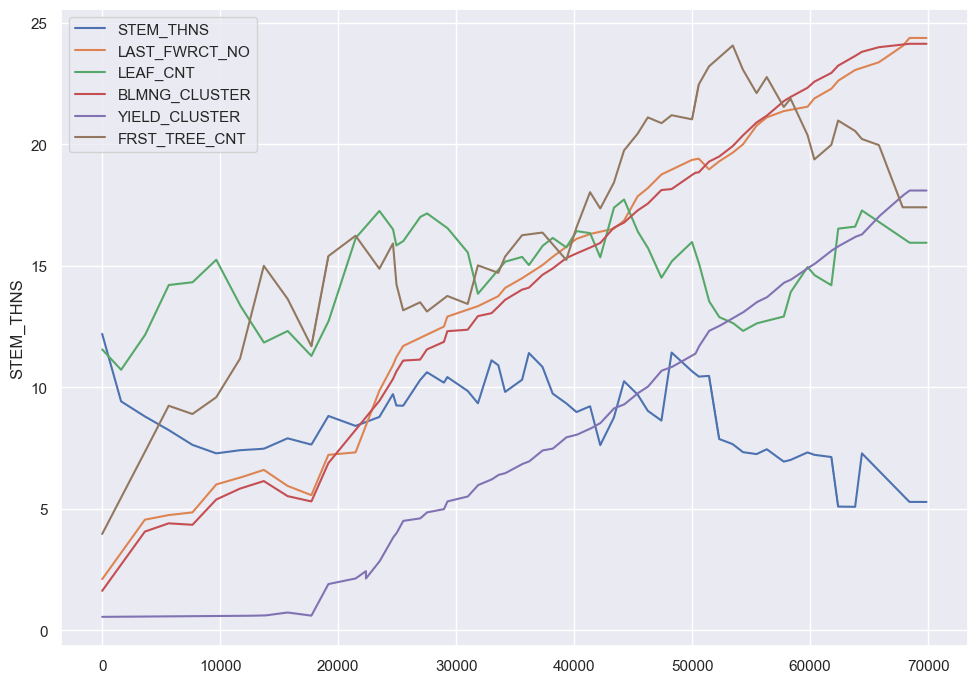

In [20]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7, 8.27)})
for k in growth["small"].keys():
    sns.lineplot(data=df[k], label=k)

In [21]:
df.to_csv("data/merged_interpolated.csv", index=False)

In [6]:
# 생육정보는 약 7일 간격으로 수집되며 개화군의 차이는 다음과 같다
x = "RTTN_PUMP_OPRT_YN"

before = 0
count = 0
for i in range(1, df.shape[0]):
    if df[x].iloc[i] != df[x].iloc[i-1]:
        count += 1
        print(df["MSRM_DT"].iloc[i], f"Difference: {df[x].iloc[i] - df[x].iloc[i-1]:.4f}")
print(count)
    

2022-10-16 10:15:00 Difference: 1.0000
2022-10-18 05:20:00 Difference: -1.0000
2022-10-18 07:15:00 Difference: 1.0000
2022-10-18 20:45:00 Difference: -1.0000
2022-10-18 21:00:00 Difference: 1.0000
2022-10-18 22:10:00 Difference: -1.0000
2022-10-18 22:40:00 Difference: 1.0000
2022-10-18 23:15:00 Difference: -1.0000
2022-10-18 23:35:00 Difference: 1.0000
2022-10-19 00:00:00 Difference: -1.0000
2022-10-19 00:20:00 Difference: 1.0000
2022-10-19 00:45:00 Difference: -1.0000
2022-10-19 07:15:00 Difference: 1.0000
2022-10-20 06:30:00 Difference: -1.0000
2022-10-20 07:55:00 Difference: 1.0000
2022-10-23 02:05:00 Difference: -1.0000
2022-10-23 02:20:00 Difference: 1.0000
2022-10-23 04:55:00 Difference: -1.0000
2022-10-23 05:10:00 Difference: 1.0000
2022-10-23 06:15:00 Difference: -1.0000
2022-10-23 06:40:00 Difference: 1.0000
2022-10-24 00:55:00 Difference: -1.0000
2022-10-24 01:15:00 Difference: 1.0000
2022-10-24 03:00:00 Difference: -1.0000
2022-10-24 03:20:00 Difference: 1.0000
2022-10-24 04

In [7]:
import warnings
warnings.filterwarnings("ignore") 

x = "BLMNG_CLUSTER"
y = "RTTN_PUMP_OPRT_YN"

df["done"] = False

before = 0
count = 0
total_count=0
total_reward = 0
for i in range(1, df.shape[0]):
    if df[y].iloc[i] != df[y].iloc[i-1]:
        count += 1
    if df[x].iloc[i] != df[x].iloc[i-1]:
        reward = df[x].iloc[i] - df[x].iloc[i-1]
        print(df["MSRM_DT"].iloc[i], "count", count, f"Difference: {reward:.4f}")
        total_reward += reward
        total_count += 1
        count = 0

        if total_reward > 1:
            df["done"].iloc[i] = True
            total_reward = 0
            print("done")
    

2022-10-20 00:00:00 count 13 Difference: 2.4400
done
2022-10-27 00:00:00 count 36 Difference: 0.3400
2022-11-03 00:00:00 count 52 Difference: -0.0600
2022-11-10 00:00:00 count 51 Difference: 1.0400
done
2022-11-17 00:00:00 count 50 Difference: 0.4500
2022-11-24 00:00:00 count 72 Difference: 0.3100
2022-12-01 00:00:00 count 18 Difference: -0.6200
2022-12-08 00:00:00 count 72 Difference: -0.2200
2022-12-13 00:00:00 count 0 Difference: 1.5800
done
2022-12-28 00:00:00 count 24 Difference: 2.5600
done
2023-01-01 00:00:00 count 44 Difference: 0.9000
2023-01-02 00:00:00 count 26 Difference: 0.3100
done
2023-01-04 00:00:00 count 19 Difference: 0.4500
2023-01-09 00:00:00 count 0 Difference: 0.0400
2023-01-11 00:00:00 count 11 Difference: 0.4200
2023-01-16 00:00:00 count 38 Difference: 0.3100
done
2023-01-17 00:00:00 count 12 Difference: 0.4400
2023-01-23 00:00:00 count 62 Difference: 0.0600
2023-01-26 00:00:00 count 24 Difference: 0.5600
done
2023-01-30 00:00:00 count 26 Difference: 0.1200
2023